In [1]:
import copernicusmarine as cms

In [2]:
import os

In [ ]:
cms.login(username='rslater')

In [4]:
catalogue = cms.describe()
catalogue

Fetching catalog: 100%|█| 3/3 [00:13<00:00, 


{'products': [{'title': 'Antarctic Sea Ice Extent from Reanalysis',
   'product_id': 'ANTARCTIC_OMI_SI_extent',
   'thumbnail_url': 'https://documentation.marine.copernicus.eu/IMG/ANTARCTIC_OMI_SI_extent.png',
   'digital_object_identifier': '10.48670/moi-00186',
   'sources': ['Numerical models'],
   'processing_level': None,
   'production_center': 'Mercator Océan International'},
  {'title': 'Antarctic Monthly Sea Ice Extent from Observations Reprocessing',
   'product_id': 'ANTARCTIC_OMI_SI_extent_obs',
   'thumbnail_url': 'https://documentation.marine.copernicus.eu/IMG/ANTARCTIC_OMI_SI_extent_obs.png',
   'digital_object_identifier': '10.48670/moi-00187',
   'sources': ['Satellite observations'],
   'processing_level': None,
   'production_center': 'MET Norway'},
  {'title': 'Arctic Ocean Biogeochemistry Analysis and Forecast',
   'product_id': 'ARCTIC_ANALYSISFORECAST_BGC_002_004',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/ARCTIC_ANALY

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame.from_dict(catalogue['products'])
product = df.loc[df['title'].isin(['Global Ocean Physics Reanalysis'])]
display(product)
product = product.squeeze()

,title,product_id,thumbnail_url,digital_object_identifier,sources,processing_level,production_center
45,Global Ocean Physics Reanalysis,GLOBAL_MULTIYEAR_PHY_001_030,https://mdl-metadata.s3.waw3-1.cloudferro.com/...,10.48670/moi-00021,[Numerical models],Level 4,Mercator Océan International


In [7]:
from IPython.display import Image
Image(url=product['thumbnail_url']) 

In [8]:
cms.open_dataset?

Signature:
cms.open_dataset(
    dataset_url: Optional[str] = None,
    dataset_id: Optional[str] = None,
    dataset_version: Optional[str] = None,
    dataset_part: Optional[str] = None,
    username: Optional[str] = None,
    password: Optional[str] = None,
    variables: Optional[List[str]] = None,
    minimum_longitude: Optional[float] = None,
    maximum_longitude: Optional[float] = None,
    minimum_latitude: Optional[float] = None,
    maximum_latitude: Optional[float] = None,
    minimum_depth: Optional[float] = None,
    maximum_depth: Optional[float] = None,
    vertical_dimension_as_originally_produced: bool = True,
    start_datetime: Union[datetime.datetime, str, NoneType] = None,
    end_datetime: Union[datetime.datetime, str, NoneType] = None,
    subset_method: Literal['nearest', 'strict'] = 'nearest',
    service: Optional[str] = None,
    credentials_file: Union[pathlib.Path, str, NoneType] = None,
    overwrite_metadata_cache: bool = False,
    no_metadata_cache: bo

In [9]:
ds = cms.open_dataset(dataset_id = 'cmems_mod_glo_phy_my_0.083deg-climatology_P1M-m')
ds

INFO - 2024-11-27T16:30:59Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-11-27T16:30:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-27T16:31:10Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 175GB
Dimensions:    (depth: 50, latitude: 2041, longitude: 4320, time: 12)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 96B 1993-01-01 1993-02-01 ... 1993-12-01
Data variables:
    bottomT    (time, latitude, longitude) float64 846MB ...
    mlotst     (time, latitude, longitude) float64 846MB ...
    siconc     (time, latitude, longitude) float64 846MB ...
    sithick    (time, latitude, longitude) float64 846MB ...
    so         (time, depth, latitude, longitude) float64 42GB ...
    thetao     (time, depth, latitude, longitude) float64 42GB ...
    uo         (time, depth, latitude, longitude) float64 42GB ...
    usi        (time, latitude, longitude) float64 846MB ...
    vo         (time, depth, latitude, longitude) float64 42GB ...
    vsi        (time, latitude, longitude) float64 846MB ...
    zos        (time, latitude, longitude) float64 846MB ...
Attributes: (12/16)
    CDI:                           Climate Data Interface version 1.9.3 (http...
    CDO:                           Climate Data Operators version 1.9.3 (http...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly climatology fields for product GLO...

In [10]:
subset = ds.thetao.isel(depth=10).sel(time='1993-01-01T00:00:00.000000000').sel(latitude=slice(-90,-50))
subset

<xarray.DataArray 'thetao' (latitude: 361, longitude: 4320)> Size: 12MB
[1559520 values with dtype=float64]
Coordinates:
    depth      float32 4B 15.81
  * latitude   (latitude) float32 1kB -80.0 -79.92 -79.83 ... -50.08 -50.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
    time       datetime64[ns] 8B 1993-01-01
Attributes:
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C

In [11]:
_subset = subset.load()

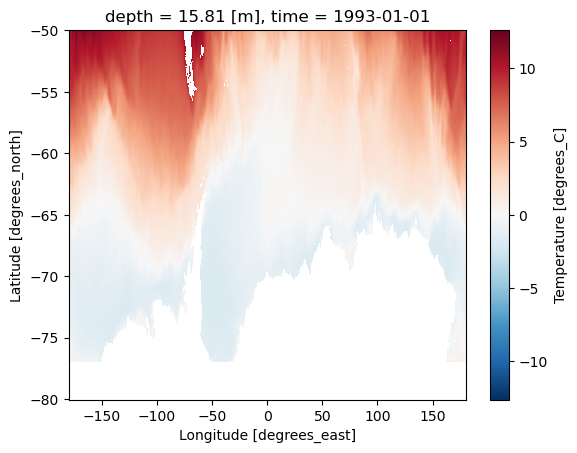

In [12]:
_subset.plot.imshow()

In [17]:
cms.subset(dataset_id = 'cmems_mod_glo_phy_my_0.083deg_P1M-m',
    variables = ['thetao'],
    minimum_latitude = -80,
    maximum_latitude = -50,
    # output_filename = 'test.zarr',
    file_format = 'zarr',)

INFO - 2024-11-27T16:37:54Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-11-27T16:37:54Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-27T16:37:56Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-11-27T16:37:57Z - Downloading using service arco-time-series...
INFO - 2024-11-27T16:37:59Z - <xarray.Dataset> Size: 213GB
Dimensions:    (depth: 50, latitude: 361, longitude: 4320, time: 342)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 1kB -80.0 -79.92 -79.83 ... -50.08 -50.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2021-06-01
Data variables:
    thetao     (time, depth, latitude, longitude) float64 213GB dask.array<chunksize=(68, 2, 64, 64), meta=np.ndarray>
Attributes: (12/15)
    Conven

  Y


INFO - 2024-11-27T16:38:07Z - Writing to local storage. Please wait...


  0%|          | 0/306002 [00:00<?, ?it/s]

INFO - 2024-11-27T16:49:39Z - Successfully downloaded to cmems_mod_glo_phy_my_0.083deg_P1M-m_thetao_180.00W-179.92E_80.00S-50.00S_0.49-5727.92m_1993-01-01-2021-06-01.zarr


PosixPath('cmems_mod_glo_phy_my_0.083deg_P1M-m_thetao_180.00W-179.92E_80.00S-50.00S_0.49-5727.92m_1993-01-01-2021-06-01.zarr')

In [18]:
import xarray as xr
ds = xr.open_zarr('./cmems_mod_glo_phy_my_0.083deg_P1M-m_thetao_180.00W-179.92E_80.00S-50.00S_0.49-5727.92m_1993-01-01-2021-06-01.zarr').isel(depth=10, time=0)

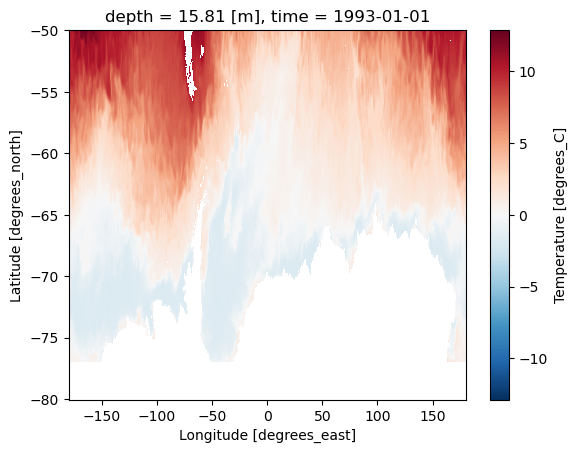

In [19]:
ds.thetao.plot.imshow()

In [20]:
import matplotlib.pyplot as plt

In [21]:
import cartopy.crs as ccrs
epsg_3031 = ccrs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

In [22]:
ds = ds.rio.write_crs('epsg:4326')
ds

<xarray.Dataset> Size: 12MB
Dimensions:      (latitude: 361, longitude: 4320)
Coordinates:
    depth        float32 4B 15.81
  * latitude     (latitude) float32 1kB -80.0 -79.92 -79.83 ... -50.08 -50.0
  * longitude    (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
    time         datetime64[ns] 8B 1993-01-01
    spatial_ref  int64 8B 0
Data variables:
    thetao       (latitude, longitude) float64 12MB dask.array<chunksize=(64, 64), meta=np.ndarray>
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:      1.3.4
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly mean fields for product GLOBAL_REA...

In [23]:
ds = ds.rio.reproject(epsg_3031)

In [24]:
ds.rio.to_raster('./test.tif')

(-4510626.448476883, 4495027.114334637, -4524537.7065313365, 4440776.270338901)

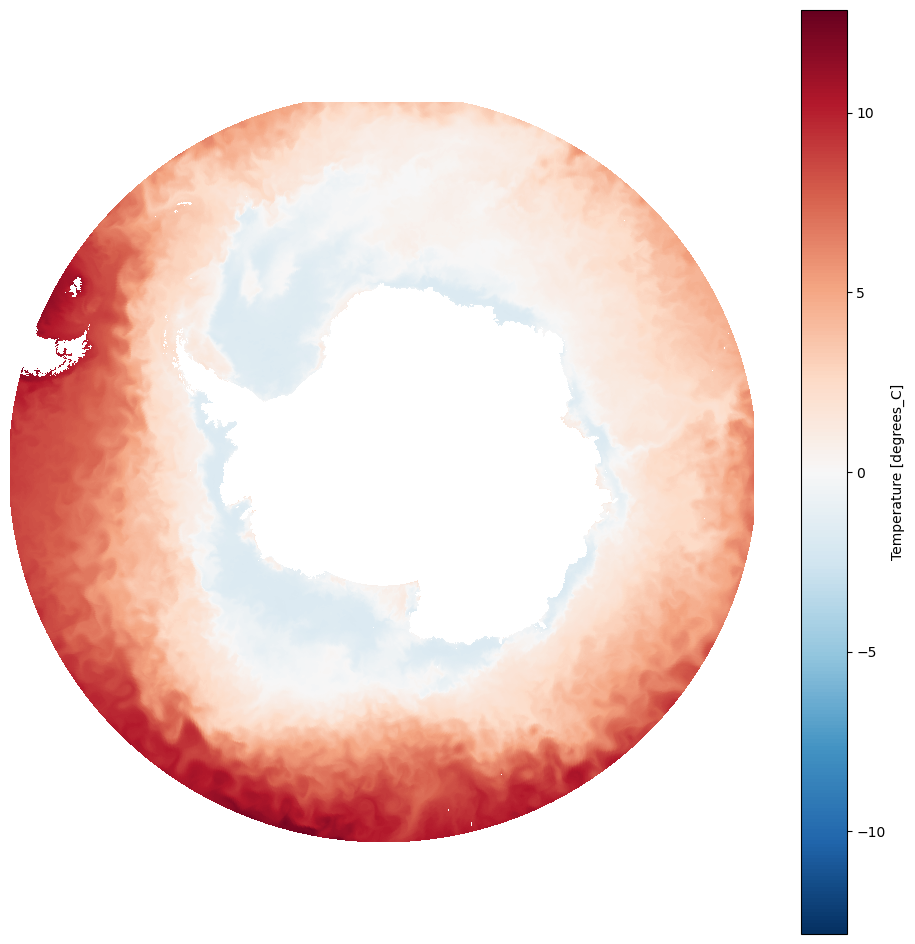

In [26]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=epsg_3031)
ds.thetao.plot.imshow(ax=ax)
ax.set_extent([-180, 180, -90, -50], crs = ccrs.PlateCarree())
plt.title('')
plt.axis('off')

In [ ]:
# %% ../02_plot.ipynb 16
def plot_acceleration(da: xr.DataArray, # xarray DataArray 
                      ax=None, #figure axis to plot to
                      vmin:float or bool=None, # colourbar minimum data value
                      vmax:float or bool=None, # colourbar maximum data value
                      cmap:str="RdBu_r", # data colourmap
                      cbar_label:str=r"Acceleration (m a$^{-2}$)", #colourbar label text
                      gridlines:bool=False, # add lat lon gridlines to axis
                      coast_and_gl:bool=True, # add coastline and grounding line to axis
                      border:bool=True, # border around data
                      title:str="", # figure title
                      fontsize:int=14
                     ):
    "Plot ice acceleration on top of Antarctic coastline and grounding lines"
    
    if ax is None:
        plt.figure(figsize=(12, 12))
        ax = plt.axes(projection=epsg_3031)

    p995 = np.nanpercentile(da, 99.5) #ds.sel(degree=1).polyfit_coefficients
    if vmin is None:
        vmin = -p995
    if vmax is None:
        vmax = p995
    
    cb = da.plot.imshow( 
        ax=ax,
        cmap=cmap,
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
        )
    
    cbar_kwargs={
        # "ax": ax,
        "label": cbar_label,
        "location": "bottom",
        "shrink": 0.9,
        "pad": 0.05,
        "extend":"both"
        }

    cbar = plt.colorbar(cb, ax=ax, **cbar_kwargs)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_label(label=cbar_label, size=fontsize)
    
    if coast_and_gl:
        add_coast_and_gl(ax)
    if gridlines:
        gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
        gl.bottom_labels = False
        gl.left_labels = False
    if border == False:
        ax.axis("off")
    
    plt.title(title, fontsize=fontsize)
    
    return ax

In [39]:
t2m = xr.open_mfdataset('/resstore/b0133/Data/ERA5/2m_temperature/2023*.nc', chunks='auto')#.t2m.isel(time=0).plot.imshow()
t2m

<xarray.Dataset> Size: 465MB
Dimensions:      (time: 365, lat: 221, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
    realization  int64 8B 0
  * lat          (lat) float64 2kB -90.0 -89.75 -89.5 ... -35.5 -35.25 -35.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    t2m          (time, lat, lon) float32 465MB dask.array<chunksize=(31, 221, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2023-02-15T17:41 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [53]:
mean_t2m = (t2m.t2m.mean(dim='time') - 273.15).compute()
mean_t2m

<xarray.DataArray 't2m' (lat: 221, lon: 1440)> Size: 1MB
array([[-44.79541 , -44.79541 , -44.79541 , ..., -44.79541 , -44.79541 ,
        -44.79541 ],
       [-44.84445 , -44.84285 , -44.841263, ..., -44.849274, -44.847656,
        -44.846054],
       [-44.94043 , -44.93724 , -44.93402 , ..., -44.950012, -44.946823,
        -44.943665],
       ...,
       [ 17.238495,  17.231781,  17.235138, ...,  17.218414,  17.225922,
         17.232666],
       [ 17.32486 ,  17.332   ,  17.336853, ...,  17.315247,  17.316711,
         17.32016 ],
       [ 17.422363,  17.42923 ,  17.432617, ...,  17.391052,  17.404236,
         17.421082]], dtype=float32)
Coordinates:
    realization  int64 8B 0
  * lat          (lat) float64 2kB -90.0 -89.75 -89.5 ... -35.5 -35.25 -35.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8

(-4510626.448476883, 4495027.114334637, -4524537.7065313365, 4440776.270338901)

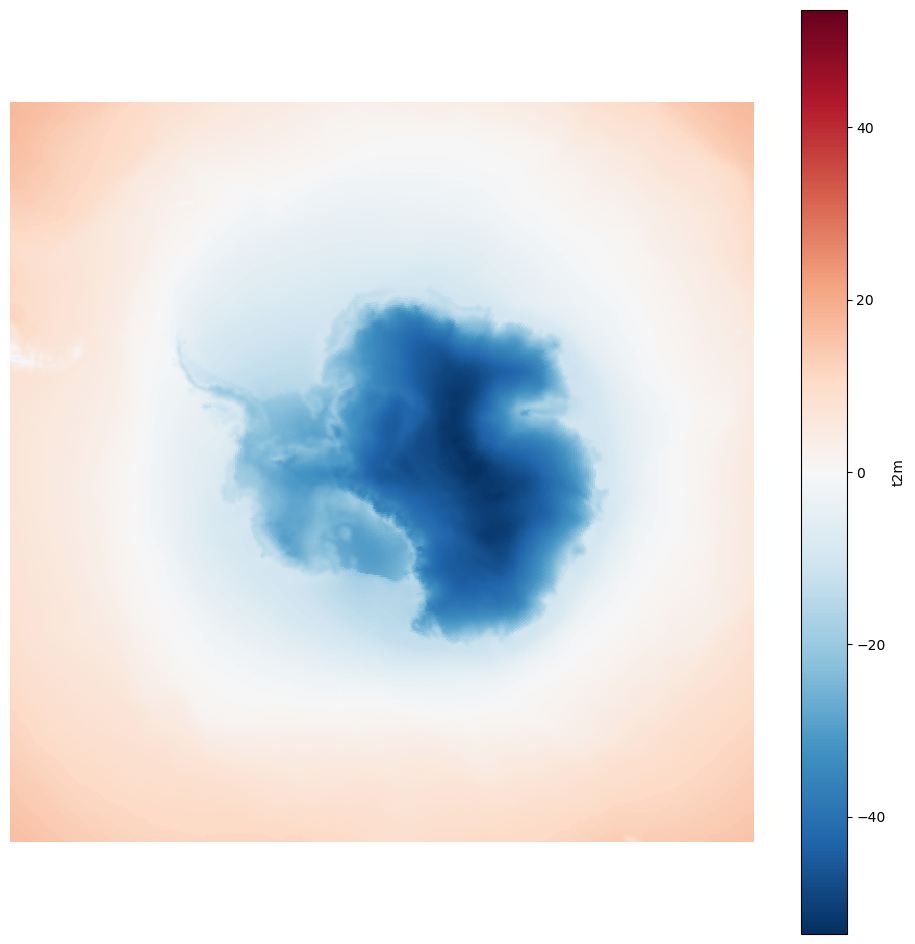

In [54]:
_mean_t2m = mean_t2m.rio.write_crs('epsg:4326')
_mean_t2m = _mean_t2m.rio.reproject(epsg_3031)
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=epsg_3031)
_mean_t2m.plot.imshow(ax=ax)
ax.set_extent([-180, 180, -90, -50], crs = ccrs.PlateCarree())
plt.title('')
plt.axis('off')